# Take Home Quiz 1

---

This homework should be submitted **by LT** on ALICE.

## Libraries

---

Do <b>NOT</b> import any other libraries aside from those below.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

plt.rcParams['figure.figsize'] = [15, 5]

## Part 1. Combinations of Functions

---

For a more detailed discussion on combinations of functions, see [`Paul's Online Notes`](http://tutorial.math.lamar.edu/Classes/Alg/CombineFunctions.aspx).

Let the following: 

- $f(x) = \sin(2\pi x)$ 


- $g(x) = \cos\left(\frac{x}{\pi}\right)$

### Preliminaries

---

#### Q. Create a numpy array (called `x`) of 1000 equally spaced numbers from -25 to 25.

In [2]:
x = np.linspace(-25, 25, 1000)

#### Q. Create two functions called `f(x)` and `g(x)` as defined above.

In [3]:
def f(x):
    return np.sin(2 * np.pi * x)

def g(x):
    return np.cos(x / np.pi)

#### Q. Plot both graphs of `f(x)` and `g(x)` simulteneously (i.e. on the same plot) as a <b><u>solid blue line</u></b> and <b><u>solid red line</u></b>, respectively.

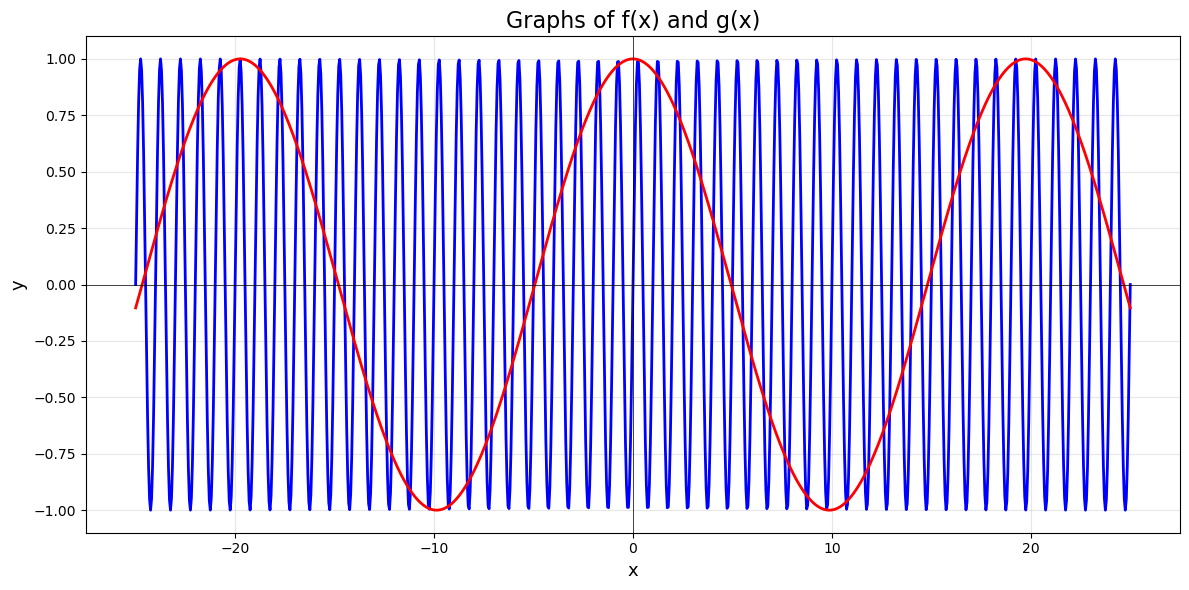

In [4]:
plt.figure(figsize=(12, 6))

plt.plot(x, f(x), 'b-', linewidth=2, label=r'$f(x) = \sin(2\pi x)$')
plt.plot(x, g(x), 'r-', linewidth=2, label=r'$g(x) = \cos\left(\frac{x}{\pi}\right)$')

plt.title('Graphs of f(x) and g(x)', fontsize=16)
plt.xlabel('x', fontsize=13)
plt.ylabel('y', fontsize=13)
plt.axhline(y=0, color='k', linewidth=0.5)
plt.axvline(x=0, color='k', linewidth=0.5)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

#### Q. Based on the resulting plot above, describe the differences between the two functions. Answer in 1 to 2 sentences.

The main difference is how fast they oscillate. f(x) has a very short period, so it completes many waves across the graph, while g(x) has a much longer period, so it stretches out and only completes a few waves. Both functions have the same height (amplitude of 1).

### Sums of Functions

---

#### Q. Plot a graph of $f(x) + g(x)$ as a <b><u>solid blue line</u></b>.

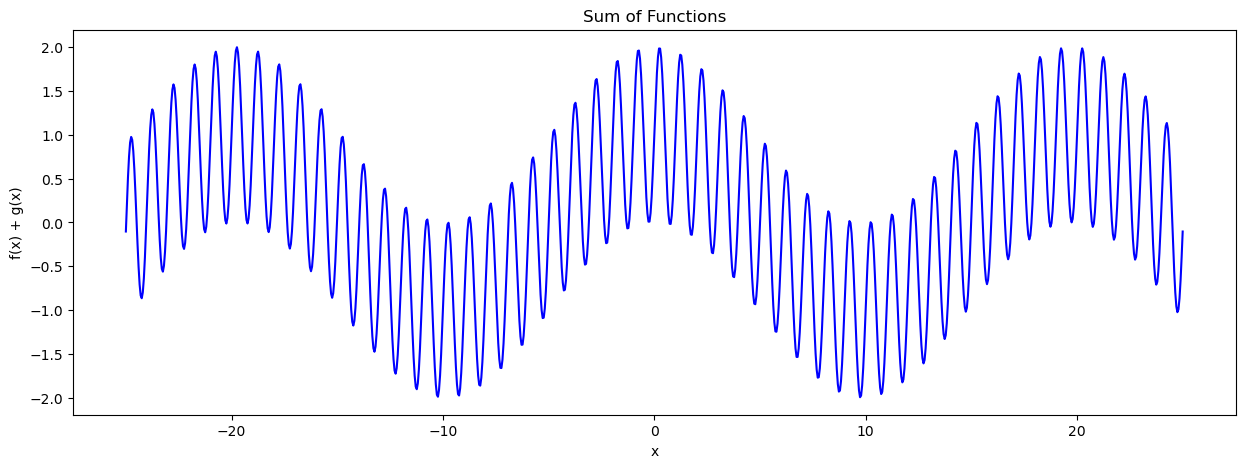

In [5]:
y_sum = f(x) + g(x)

plt.plot(x, y_sum, 'b-')  # solid blue line
plt.xlabel("x")
plt.ylabel("f(x) + g(x)")
plt.title("Sum of Functions")
plt.show()


#### Q. Describe how the two sinusoids interact when you add them. Answer in 1 to 2 sentences.

For every x, the sum is (f+g)(x)=f(x)+g(x), so the fast oscillations from f(x) sit on top of the slower up/down change from g(x). When they have the same sign the peaks grow, and when they have opposite signs they cancel and the wave shrinks.

### Products of Functions

---

#### Q. Plot a graph of $f(x)g(x)$ as a <b><u>solid red line</u></b>. (1 pt.)

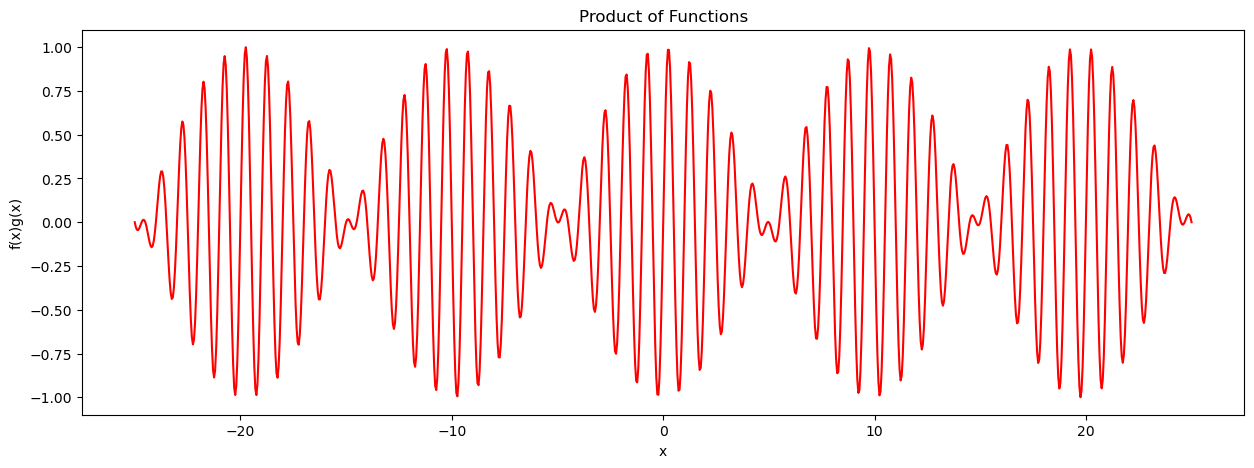

In [6]:
y_prod = f(x) * g(x)

plt.plot(x, y_prod, 'r-')   # solid red line
plt.xlabel("x")
plt.ylabel("f(x)g(x)")
plt.title("Product of Functions")
plt.show()

#### Q. Describe how the two sinusoids interact when you multiply them. Answer in 1 to 2 sentences.

When you multiply them, g(x) scales f(x), so the sine wave that oscillates more frequently gets larger or smaller depending on g(x). When g(x) is negative, the product flips sign, and when g(x) is near 0 the product shrinks toward 0.

### Composite Functions

---

#### Q. Plot a graph of $f(g(x))$ as a <b><u>solid green line</u></b>.

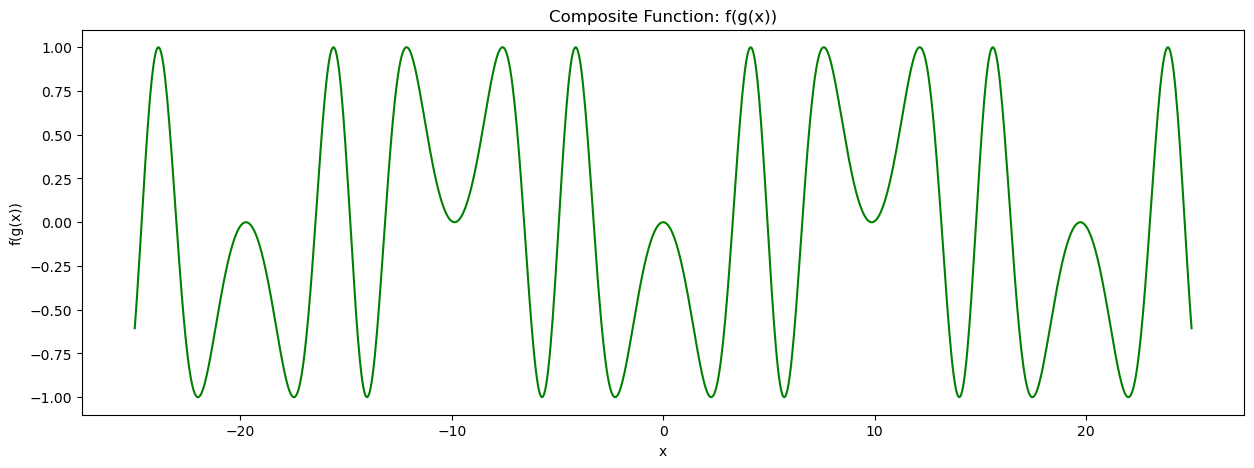

In [7]:
y_comp = f(g(x))          # f(g(x))
plt.plot(x, y_comp, 'g-') # solid green line
plt.xlabel("x")
plt.ylabel("f(g(x))")
plt.title("Composite Function: f(g(x))")
plt.show()

#### Q. Describe how the two sinusoids interact they are composited in 1 to 2 sentences.

In a composition, we plug g(x) into f, so the output is f(g(x)). This makes the sine wave’s input depend on g(x), so the wave’s spacing changes as g(x) changes instead of staying evenly spaced like a normal sine.

### An Additive Model with Trend

---

#### Q. Plot all three graphs simulteneously as <b><u>dashed lines</u></b> (keep the colors specified above).

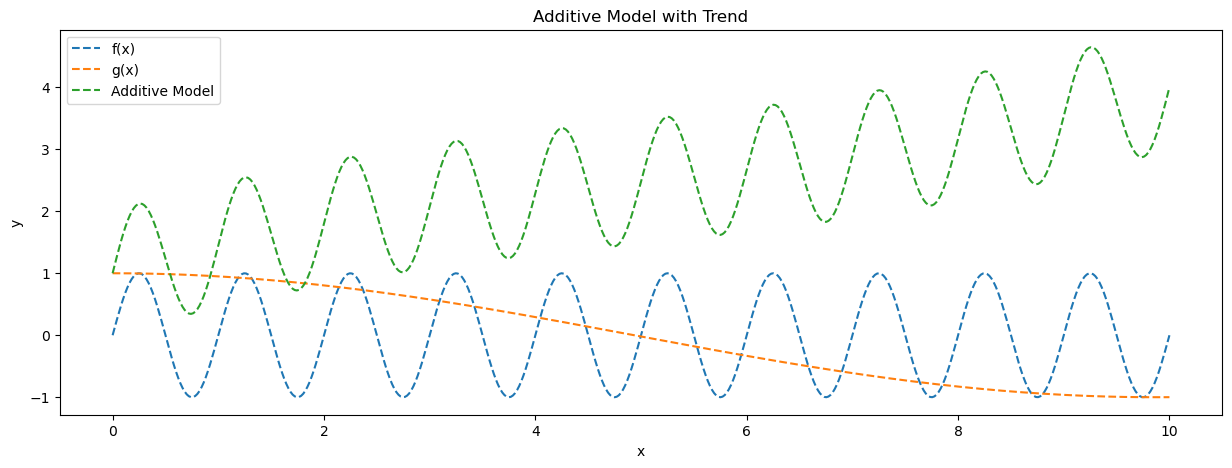

In [8]:
x = np.linspace(0, 10, 500)

f_x = np.sin(2 * np.pi * x)
g_x = np.cos(x / np.pi)
trend = 0.5 * x 
additive_model = f_x + g_x + trend

plt.plot(x, f_x, '--', label='f(x)')
plt.plot(x, g_x, '--', label='g(x)')
plt.plot(x, additive_model, '--', label='Additive Model')

plt.title('Additive Model with Trend')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

#### Q. Let's try adding a positive linear trend. Plot a graph of $f(x) + g(x) + \frac{1}{8}x$ as a <b><u>solid green line</u></b>.

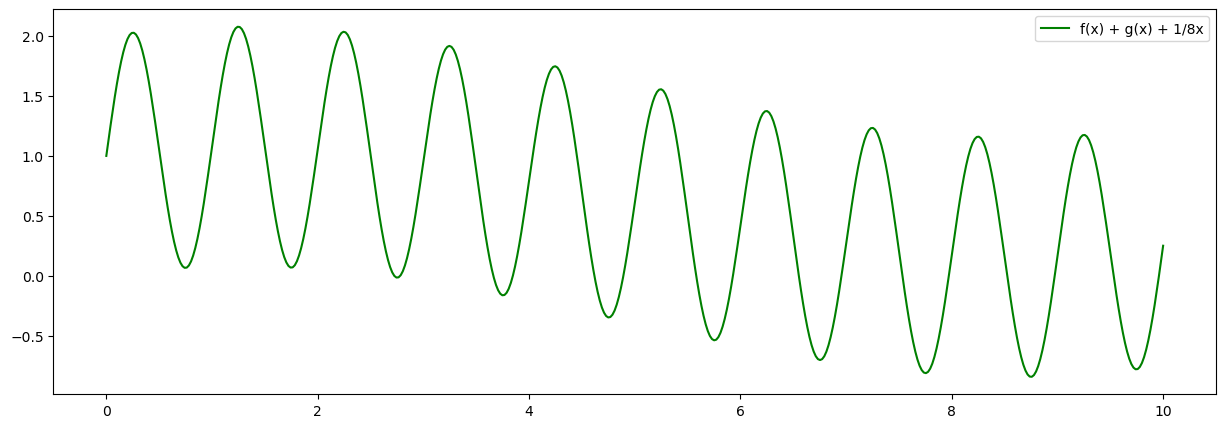

In [9]:
x = np.linspace(0, 10, 500)

f_x = np.sin(2 * np.pi * x)
g_x = np.cos(x / np.pi)
trend = (1/8) * x

additive_model = f_x + g_x + trend

plt.plot(x, additive_model, color='green', linestyle='-', label='f(x) + g(x) + 1/8x')

plt.legend()
plt.show()

#### Q. What kinds of data could reasonably follow the function described above? Answer in 2 to 3 sentences.

The function above shows a time-series data, characterized by multi-period seasonality and a positive linear trend. A real world example using these functions would be monthly retail sales or international airline passenger traffic, where recurring seasonal cycles are layered over consistent long-term growth.

## Part 2. Curve Fitting

---

For this sections, we will be using the following datasets: `fit_data1.csv`, `fit_data2.csv`, `fit_data3.csv`, `fit_data4.csv`.

### `fit_data1.csv`

---

#### Q. Load the `fit_data1.csv` dataset using pandas and print the dataframe.

In [10]:
df_1 = pd.read_csv('data/fit_data1.csv')

df_1

,x,y
0,0.000000,292.073549
1,0.707071,214.164335
2,1.414141,230.606929
3,2.121212,303.335048
4,2.828283,251.714122
...,...,...
95,67.171717,428.026119
96,67.878788,397.565071
97,68.585859,337.196256
98,69.292929,403.412667


#### Q. Create two variables `x` and `y` and assign the corresponding dataframe columns to them. Convert `x` and `y` into numpy arrays.

In [11]:
x = np.array(df_1['x'])
y = np.array(df_1['y'])

print(x)
print(y)

[ 0.          0.70707071  1.41414141  2.12121212  2.82828283  3.53535354
  4.24242424  4.94949495  5.65656566  6.36363636  7.07070707  7.77777778
  8.48484848  9.19191919  9.8989899  10.60606061 11.31313131 12.02020202
 12.72727273 13.43434343 14.14141414 14.84848485 15.55555556 16.26262626
 16.96969697 17.67676768 18.38383838 19.09090909 19.7979798  20.50505051
 21.21212121 21.91919192 22.62626263 23.33333333 24.04040404 24.74747475
 25.45454545 26.16161616 26.86868687 27.57575758 28.28282828 28.98989899
 29.6969697  30.4040404  31.11111111 31.81818182 32.52525253 33.23232323
 33.93939394 34.64646465 35.35353535 36.06060606 36.76767677 37.47474747
 38.18181818 38.88888889 39.5959596  40.3030303  41.01010101 41.71717172
 42.42424242 43.13131313 43.83838384 44.54545455 45.25252525 45.95959596
 46.66666667 47.37373737 48.08080808 48.78787879 49.49494949 50.2020202
 50.90909091 51.61616162 52.32323232 53.03030303 53.73737374 54.44444444
 55.15151515 55.85858586 56.56565657 57.27272727 57.

#### Q. Plot a graph of the data as a <b><u>dashed blue line</u></b>.

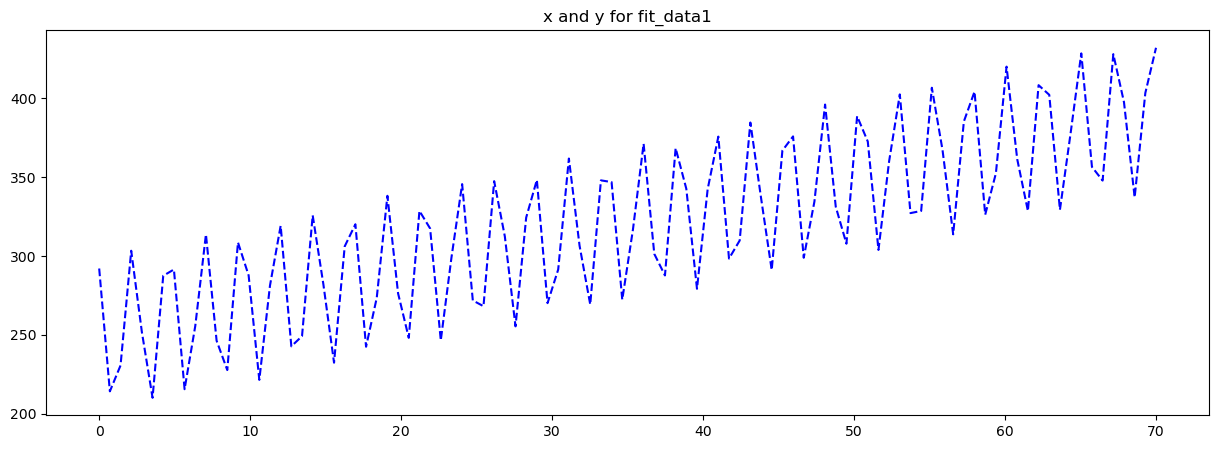

In [12]:
plt.plot(x, y, '--', color='blue')
plt.title('x and y for fit_data1')
plt.show()

#### Q. Based on the plot above, create your own custom function to fit the data. Print the optimal parameters and SSR. 

In [13]:
def custom_fit_1(x, a, b, c, d):
    return a * np.sin(2 * np.pi * x) + b * np.cos(x / np.pi) + c * x + d

popt, pcov = curve_fit(custom_fit_1, x, y)

print("Optimal parameters (a, b, c, d):", popt)

y_pred = custom_fit_1(x, *popt)
ssr = np.sum((y - y_pred)**2)
print("SSR:", ssr)

Optimal parameters (a, b, c, d): [2.70158086e+01 4.90508407e-02 2.00012472e+00 2.50416977e+02]
SSR: 89376.44511626486


#### Q. Plot the data as <u><b>blue dots</u></b> and plot you fitted function as a <b><u>smooth solid red line</u></b>.

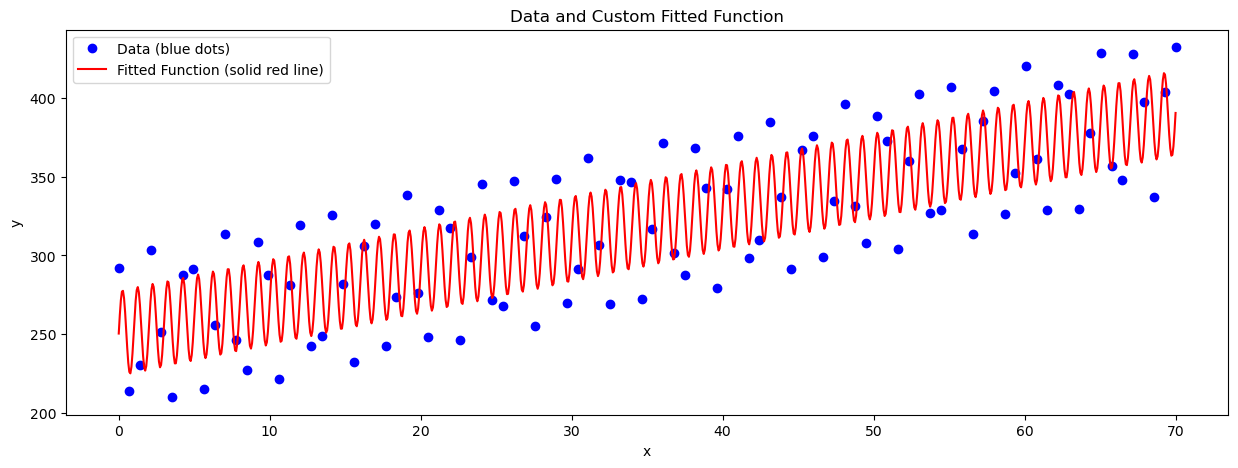

In [14]:
x_smooth = np.linspace(x.min(), x.max(), 1000)

y_smooth = custom_fit_1(x_smooth, *popt)

plt.plot(x, y, 'bo', label='Data (blue dots)')

plt.plot(x_smooth, y_smooth, 'r-', label='Fitted Function (solid red line)')

plt.title('Data and Custom Fitted Function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

### `fit_data2.csv`

---

#### Q. Load the `fit_data2.csv` dataset using pandas and print the dataframe.

In [15]:
# Insert code here
df_2 = pd.read_csv('data/fit_data2.csv')
df_2

,x,y
0,0.000000,0.000000
1,0.008008,0.007944
2,0.016016,0.015762
3,0.024024,0.023454
4,0.032032,0.031022
...,...,...
995,7.967968,0.002760
996,7.975976,0.002741
997,7.983984,0.002722
998,7.991992,0.002703


#### Q. Create two variables `x` and `y` and assign the corresponding dataframe columns to them. Convert `x` and `y` into numpy arrays.

In [16]:
# Insert code here
x = np.array(df_2['x'])
y = np.array(df_2['y'])

#### Q. Plot a graph of the data as a <b><u>dashed blue line</u></b>.

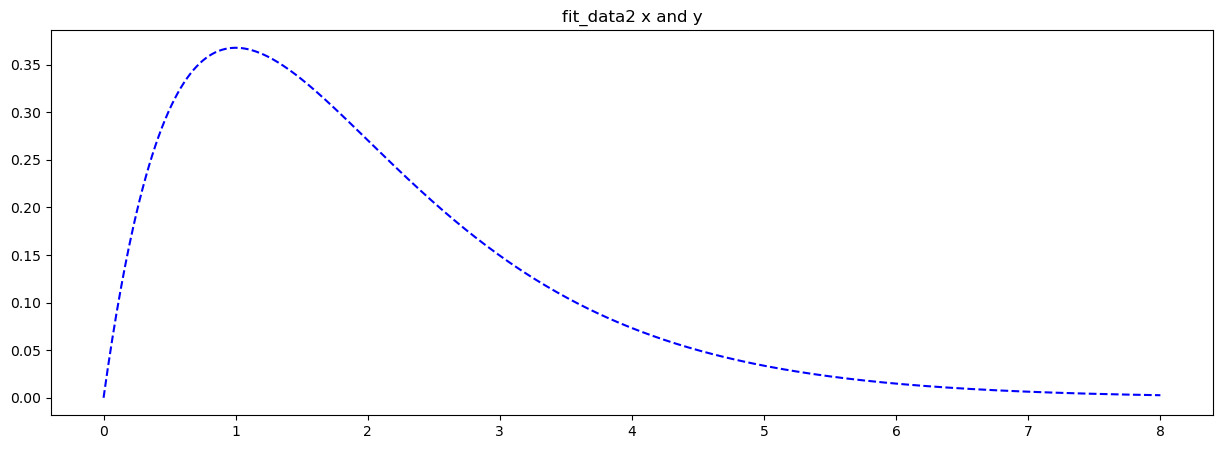

In [17]:
# Insert code here
plt.plot(x, y, 'b--')
plt.title('fit_data2 x and y')
plt.show()

#### Q. Based on the plot above, create your own custom function to fit the data. Print the optimal parameters and SSR. 

In [18]:
# # Insert code here
def fit_2(x,a,c,d,A,b2):
    return (a*(x**2)+(c*x)+d) + (A*np.exp(-b2*x))


In [19]:
popt, pcov = curve_fit(fit_2,x,y)

ssr = sum((y-fit_2(x,*popt))**2)

parameters= ['a','c','d','A','b2']
for i in range(len(popt)):
    print(f'{parameters[i]:>6} = {popt[i]:.6f}')
    
print(f'{'ssr':>6} = {ssr:.6f}')

     a = 0.013468
     c = -0.175065
     d = 0.567288
     A = -0.594376
    b2 = 2.499566
   ssr = 0.110333


#### Q. Plot the data as <u><b>blue dots</u></b> and plot you fitted function as a <b><u>smooth solid red line</u></b>. 

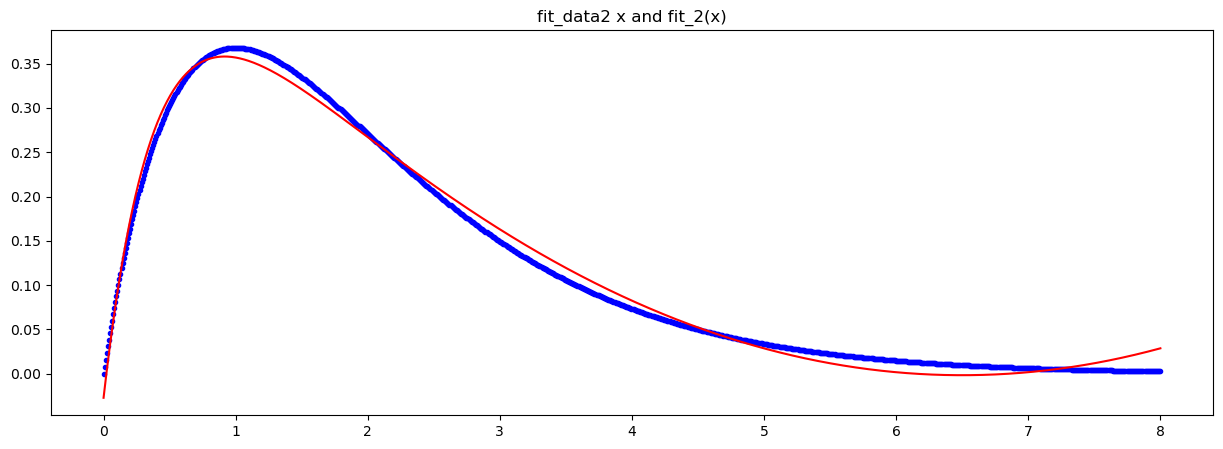

In [20]:
# Insert code here
plt.plot(x, y, 'b.')
plt.plot(x, fit_2(x,*popt), 'r-')
plt.title('fit_data2 x and fit_2(x)')
plt.show()

### `fit_data3.csv`

---

#### Q. Load the `fit_data3.csv` dataset using pandas and print the dataframe.

In [21]:
# Insert code here
df_3 = pd.read_csv('data/fit_data3.csv')
df_3

,x,y
0,-12.566371,1.000000
1,-12.312505,0.470743
2,-12.058638,0.232564
3,-11.804772,0.126156
4,-11.550906,0.078146
...,...,...
95,11.550906,12.796559
96,11.804772,7.926702
97,12.058638,4.299893
98,12.312505,2.124303


#### Q. Create two variables `x` and `y` and assign the corresponding dataframe columns to them. Convert `x` and `y` into numpy arrays.

In [22]:
# Insert code here
x = np.array(df_3['x'])
y = np.array(df_3['y'])

#### Q. Plot a graph of the data as a <b><u>dashed blue line</u></b>. (you may also want to check what the plot looks like as dots) 

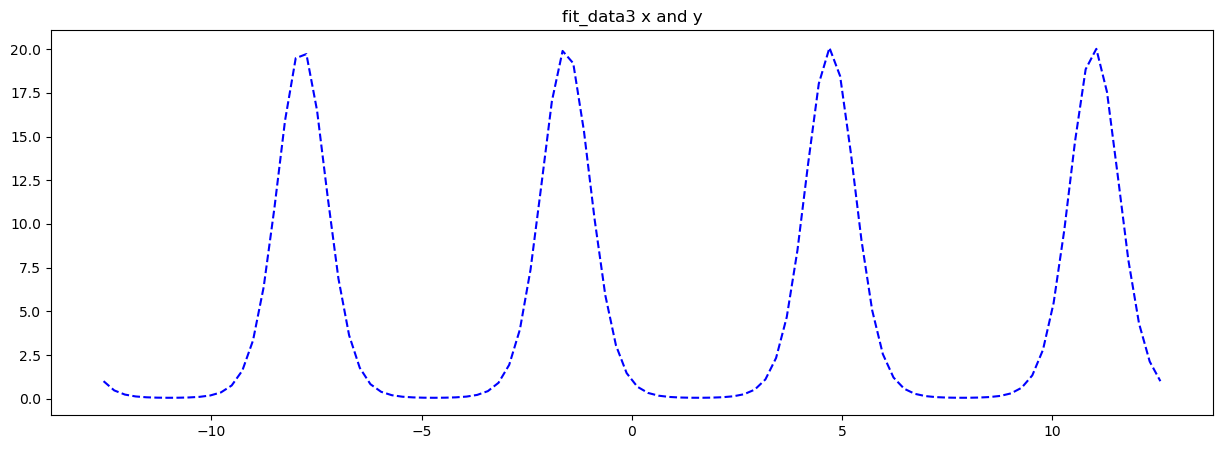

In [23]:
# Insert code here
plt.plot(x, y, 'b--')
plt.title('fit_data3 x and y')
plt.show()

#### Q. Based on the plot above, create your own custom function to fit the data. Print the optimal parameters and SSR. 

In [24]:
# # Insert code here
def fit_3(x, A, k,phi):
    return A*np.exp(k*(np.sin(x-phi)))

In [25]:
popt, pcov = curve_fit(fit_3,x,y)

ssr = sum((y-fit_3(x,*popt))**2)

parameters= ['A', 'k', 'phi']
for i in range(len(popt)):
    print(f'{parameters[i]:>6} = {popt[i]:.6f}')

print(f'{'ssr':>6} = {ssr:.6f}')

     A = 1.000000
     k = 3.000000
   phi = 3.141593
   ssr = 0.000000


#### Q. Plot the data as <u><b>blue dots</u></b> and plot you fitted function as a <b><u>smooth solid red line</u></b>. 

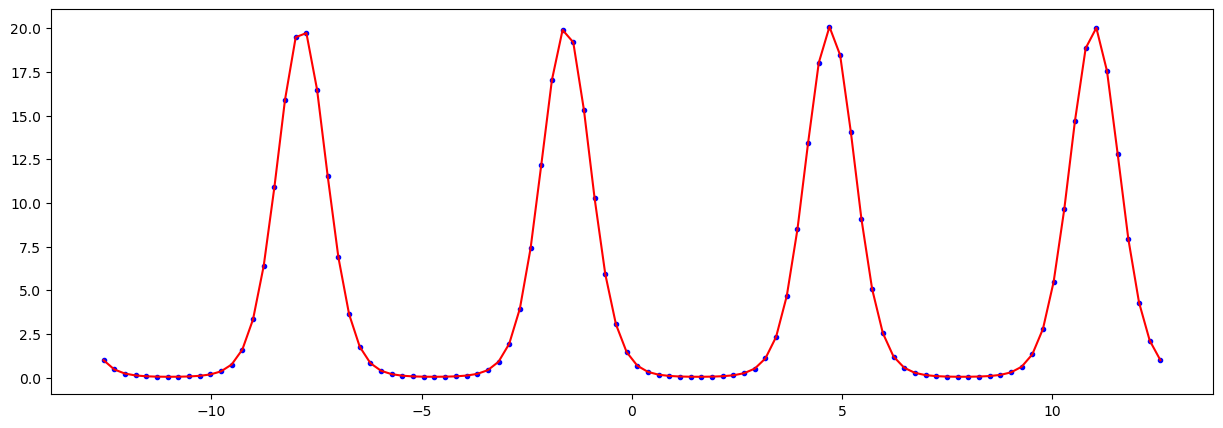

In [26]:
# Insert code here
plt.plot(x, y, 'b.')
plt.plot(x, fit_3(x,*popt), 'r-')
plt.show()

### `fit_data4.csv`

---

#### Q. Load the `fit_data4.csv` dataset using pandas and print the dataframe.

In [27]:
df_4 = pd.read_csv('data/fit_data4.csv')
df_4

,x,y
0,-5.00000,0.010799
1,-4.89899,0.005704
2,-4.79798,0.006033
3,-4.69697,0.059341
4,-4.59596,0.020562
...,...,...
95,4.59596,1.071575
96,4.69697,1.034006
97,4.79798,1.015753
98,4.89899,0.989731


#### Q. Create two variables `x` and `y` and assign the corresponding dataframe columns to them. Convert `x` and `y` into numpy arrays.

In [28]:
x = np.array(df_4['x'])
y = np.array(df_4['y'])

#### Q. Plot a graph of the data as a <b><u>dashed blue line</u></b>. (you may also want to check what the plot looks like as dots)

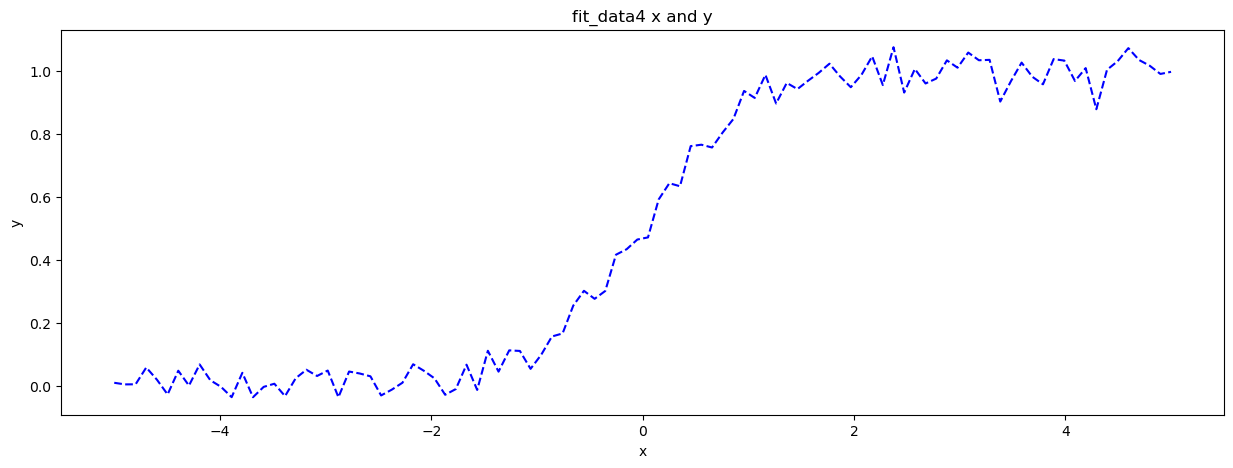

In [29]:
plt.plot(x, y, 'b--')
plt.title('fit_data4 x and y')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#### Q. Based on the plot above, create your own custom function to fit the data. Print the optimal parameters and SSR. 

In [30]:
def fit_4(x, L, k, x0):
    return L / (1 + np.exp(-k * (x - x0)))

popt, pcov = curve_fit(fit_4, x, y, p0=[1, 2, 0])

ssr = np.sum((y - fit_4(x, *popt))**2)

parameters = ['L', 'k', 'x0']
for i in range(len(popt)):
    print(f'{parameters[i]:>6} = {popt[i]:.6f}')

print(f'{"ssr":>6} = {ssr:.6f}')

     L = 1.004484
     k = 2.020937
    x0 = -0.007096
   ssr = 0.147591


#### Q. Plot the data as <u><b>blue dots</u></b> and plot you fitted function as a <b><u>smooth solid red line</u></b>.

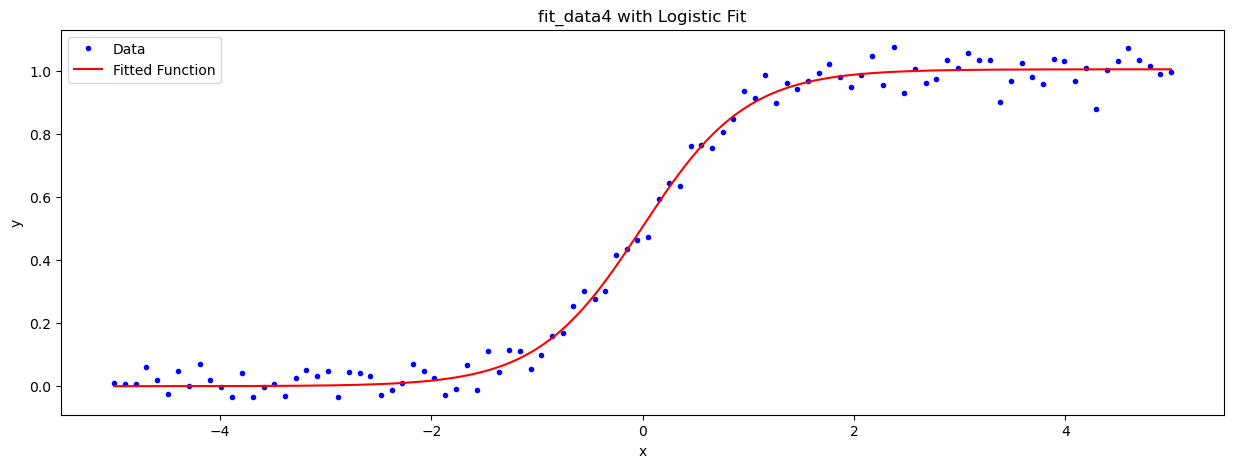

In [31]:
x_smooth = np.linspace(x.min(), x.max(), 1000)

plt.plot(x, y, 'b.', label='Data')
plt.plot(x_smooth, fit_4(x_smooth, *popt), 'r-', label='Fitted Function')
plt.title('fit_data4 with Logistic Fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()